# Predicting Car Values

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#creating a list of columns, since this data set doesn't have header info
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#reading in the file; including the columns we want for the columns
cars = pd.read_csv('imports-85.data', names=cols)
cars.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [2]:
#replacing any occurrence of '?' with NaN
cars = cars.replace('?', np.nan)
cars.head(2)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [3]:
#list of numeric columns
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

#create new dataframe containing float values for the numeric columns
numer_cars = cars[numeric_cols].astype(float)

In [4]:
#seeing how many values for each column are null
#we can see that normalized-losses has 41 missing values
numer_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
#dropping the normalized-losses column; axis=1 because we are referring to a column
numer_cars = numer_cars.drop('normalized-losses', axis=1)
numer_cars.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore',
       'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
numer_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [7]:
#dropped rows containing NaN values
numer_cars = numer_cars.dropna()

#we now see that there are no NaN values in this dataframe
numer_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [8]:
#normalize the numeric colums except for 'price' so all values range from 0 to 1
#to normalize: Z = (df - min(df))/(max(df) - min(df))
price = numer_cars['price']

numer_cars = (numer_cars - numer_cars.min())/(numer_cars.max() - numer_cars.min())
numer_cars['price'] = price
numer_cars.head(5)

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [9]:
list(numer_cars.columns)

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

## Univariate Model

In [10]:
features = ['wheel-base','length','width','height','curb-weight','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg']

#function that trains on one feature
def knn_train_test(feature, target, dataframe):
    
    # Randomize the order of rows in data frame.
    shuffled_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(shuffled_index)
    
    #instantiate a KNeighborsRegressor object 
    knn = KNeighborsRegressor()
    
    percent50 = int(randomized_df.shape[0] / 2)
    train_df = randomized_df.iloc[0:percent50]     #train data
    test_df= randomized_df.iloc[percent50:]     #test data
    
    #fit model to training data
    knn.fit(train_df[[feature]],train_df[target])
    
    #make predictions on the test data target using its feature
    predictions = knn.predict(test_df[[feature]])
    
    #calculate rmse between test data target and predicted target
    rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
    
    return rmse 

#calculating rmse for each feature in numer_cars
#and appending each feature and rmse value into the dictionary
rmse_dict = {}

for feat in features:  
    rmse = knn_train_test(feat, "price", numer_cars)
    rmse_dict[feat] = rmse
    
#convert the dictionary to a series object to
#sort it in ascending order
rmse_results_series = pd.Series(rmse_dict)
rmse_results_series.sort_values()

#curb-weight has the lowest rmse value

city-mpg            3420.033885
curb-weight         3925.412772
horsepower          4376.314318
width               4682.449052
highway-mpg         4983.166803
length              5287.374825
compression-rate    5852.340468
wheel-base          6126.240268
peak-rpm            7571.335858
stroke              8161.750861
bore                8455.851753
height              8917.742945
dtype: float64

In [11]:
#function that accepts a parameter for the k value; uses a list 
def multik_train_test(kvals, feature, target, dataframe):
    
    # Randomize the order of rows in data frame.
    shuffled_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(shuffled_index)
    
    rmse_list = []
    
    for k in kvals:
        
        #instantiate a KNeighborsRegressor object 
        knn = KNeighborsRegressor(n_neighbors=k)
    
        percent50 = int(randomized_df.shape[0] / 2)
        train_df = randomized_df.iloc[0:percent50]     #train data
        test_df= randomized_df.iloc[percent50:]        #test data
    
        #fit model to training data
        knn.fit(train_df[[feature]],train_df[target])
    
        #make predictions on the test data target using its feature
        predictions = knn.predict(test_df[[feature]])
    
        #calculate rmse between test data target and predicted target for each k value
        rmse_list.append(np.sqrt(mean_squared_error(test_df[target], predictions)))
    
    return rmse_list


#for each feature, train and test the model using a list of k values
feat_rmses = {}

for feat in features: 
    rmses = multik_train_test([1,3,5,7,9], feat, 'price', numer_cars)
    feat_rmses[feat] = rmses
    
feat_rmses

{'bore': [11218.568939531477,
  6548.1141578174647,
  6792.7322498658332,
  6339.1617925554574,
  6170.5723465208857],
 'city-mpg': [6721.8097675418039,
  4500.4738141838134,
  4176.1131933013148,
  4463.4493840757932,
  4638.9502054823051],
 'compression-rate': [7559.0102040747452,
  6700.9400534382667,
  6028.4918636929615,
  6254.3071966608795,
  6337.6616598266655],
 'curb-weight': [5853.8166984263789,
  4961.5137069418979,
  4695.5346224919276,
  4703.207423969975,
  4718.4964568897394],
 'height': [9756.4919501565419,
  7922.5057161941668,
  8061.1902744962335,
  8391.8864501872467,
  8356.147067620137],
 'highway-mpg': [6303.0130703740515,
  3826.716045036841,
  3642.8873623956647,
  3974.8841362361063,
  4312.6482808865148],
 'horsepower': [4276.8836654455663,
  4106.6749935035732,
  4063.706154660862,
  4302.3752587540166,
  4262.5919725874464],
 'length': [8054.7475232477218,
  5845.0864838256548,
  5128.5506040564078,
  5240.6227570505353,
  5389.7448841621181],
 'peak-rpm':

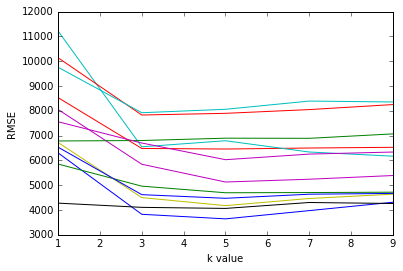

In [12]:
%matplotlib inline

#visualizing the rmses for each training feature by k value
#feat_rmse contains the values 
for feat in feat_rmses:
    x = [1,3,5,7,9]
    y = feat_rmses[feat]
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.plot(x, y)

## Multivariate Model

In [17]:
#function that accepts a parameter for the k value; uses a list 
def second_knn_train_test(kvals, feature, target, dataframe):
    
    # Randomize the order of rows in data frame.
    shuffled_index = np.random.permutation(dataframe.index)
    randomized_df = dataframe.reindex(shuffled_index)
    
    rmse_list = []
    
    for k in kvals:
        
        #instantiate a KNeighborsRegressor object 
        knn = KNeighborsRegressor(n_neighbors=k)
    
        percent50 = int(randomized_df.shape[0] / 2)
        train_df = randomized_df.iloc[0:percent50]     #train data
        test_df= randomized_df.iloc[percent50:]        #test data
    
        #fit model to training data
        knn.fit(train_df[feature],train_df[target])
    
        #make predictions on the test data target using its feature
        predictions = knn.predict(test_df[feature])
    
        #calculate rmse between test data target and predicted target for each k value
        rmse_list.append(np.sqrt(mean_squared_error(test_df[target], predictions)))
    
    return rmse_list


#for the training features list, train and test the model using a range of k values from 1 to 25
feat_rmses = {}

print("best 2 features RMSEs: " + str(second_knn_train_test(range(1,26), ['curb-weight',
'highway-mpg'], 'price', numer_cars))+ '\n')
print("best 3 features RMSEs: " + str(second_knn_train_test(range(1,26),['curb-weight',
'highway-mpg',
'city-mpg'], 'price', numer_cars))+ '\n')
print("best 4 features RMSEs: " + str(second_knn_train_test(range(1,26),['curb-weight',
'highway-mpg',
'city-mpg',
'width'], 'price', numer_cars))+ '\n')
print("best 5 features RMSEs: " + str(second_knn_train_test(range(1,26),['curb-weight',
'highway-mpg',
'city-mpg',
'width',
'horsepower'], 'price', numer_cars)))

best 2 features RMSEs: [5767.8431286870882, 4708.81585135146, 4434.1146476626855, 3899.0365176468758, 3700.5716585414207, 3949.6206346069393, 4226.8453754283573, 4504.0505733133468, 4544.1083454654554, 4728.676200188007, 4812.1686944420317, 4949.6737764491245, 5060.0213506420132, 5204.7174467736177, 5272.3426103968141, 5346.794096481759, 5409.3262328837745, 5451.9730642381555, 5560.4344194834885, 5616.1487955266011, 5654.3403392203054, 5697.2448798363403, 5624.1406856195845, 5714.7692499443165, 5687.2748675172961]

best 3 features RMSEs: [3268.8452854180787, 3540.5350324953051, 3649.9453751387296, 3536.1070807247961, 3552.6497881360124, 3580.3169730161562, 3583.2351876824564, 3547.756777405446, 3511.5360371225124, 3505.9565838959365, 3605.1544127967595, 3618.7521462147865, 3663.172797448698, 3726.6188102729775, 3821.9332083476152, 3903.2158987685466, 3879.2382329738512, 3904.8122176717288, 3925.9300888411399, 3959.4853607559676, 3974.2047013185902, 3987.1199711100098, 4044.030314459999